In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import  warnings
warnings.filterwarnings('ignore')

In [3]:
df1 = pd.read_csv('sih-11.csv')

In [4]:
df2 = pd.read_csv('sih-2 - Copy.csv')

In [5]:
df1.head()

,SOIL_MOISTURE,TEMPERATURE,HUMIDITY,RAINFALL,STATUS
0,54,22,70,202.935536,ON
1,12,20,40,226.655537,OFF
2,34,26,35,263.964248,ON
3,7,44,44,242.864034,OFF
4,50,38,23,262.717340,OFF


In [10]:
df2.head()

,CROP TYPE,SOIL TYPE,REGION,TEMPERATURE,WEATHER CONDITION,WATER REQUIREMENT
0,WHEAT,DRY,SEMI ARID,Oct-20,NORMAL,9.6
1,WHEAT,DRY,SEMI ARID,Oct-20,SUNNY,11.0
2,WHEAT,DRY,SEMI ARID,Oct-20,WINDY,10.6
3,WHEAT,DRY,SEMI ARID,Oct-20,RAINY,1.6
4,WHEAT,DRY,SEMI ARID,20-30,NORMAL,10.7


In [12]:
# Convert 'Oct-20' to '10-20'
df2['TEMPERATURE'] = df2['TEMPERATURE'].replace('Oct-20', '10-20')

# Convert temperature ranges to median
def calculate_median(temp):
    if '-' in temp:
        low, high = map(int, temp.split('-'))
        return (low + high) / 2
    return float(temp)

df2['TEMPERATURE'] = df2['TEMPERATURE'].apply(calculate_median)

# Rename 'WATER REQUIREMENT' to 'WATER REQUIREMENT IN LITRES'
df2.rename(columns={'WATER REQUIREMENT': 'WATER REQUIREMENT IN LITRES'}, inplace=True)

In [14]:
df1['TEMPERATURE'] = pd.to_numeric(df1['TEMPERATURE'], errors='coerce')
df2['TEMPERATURE'] = pd.to_numeric(df2['TEMPERATURE'], errors='coerce')


In [16]:
df3 = df2.merge(df1, on='TEMPERATURE', how='left')


In [18]:
# Count unique values in the 'CROP TYPE' column
crop_type_counts = df3["CROP TYPE"].value_counts()

# Print the counts
print("Unique value counts for 'CROP TYPE':")
print(crop_type_counts)

Unique value counts for 'CROP TYPE':
CROP TYPE
WHEAT    63
Name: count, dtype: int64


In [20]:
df5 = pd.read_csv('final_ass.csv')

In [22]:
# Calculate summary statistics
mean_water_requirement = df3['WATER REQUIREMENT IN LITRES'].mean()
median_water_requirement = df3['WATER REQUIREMENT IN LITRES'].median()
mode_water_requirement = df3['WATER REQUIREMENT IN LITRES'].mode()[0]

# Choose the central tendency measure (mean, median, or mode)
central_value = mean_water_requirement  # You can use median or mode if preferred

# Define the allowed deviation (1% of the central value)
deviation = 0.01 * central_value

# Calculate summary statistics
mean_water_requirement = df3['WATER REQUIREMENT IN LITRES'].mean()
median_water_requirement = df3['WATER REQUIREMENT IN LITRES'].median()
mode_water_requirement = df3['WATER REQUIREMENT IN LITRES'].mode()[0]

mean_soil_moisture = df3['SOIL_MOISTURE'].mean()
median_soil_moisture = df3['SOIL_MOISTURE'].median()
mode_soil_moisture = df3['SOIL_MOISTURE'].mode()[0]

mean_humidity = df3['HUMIDITY'].mean()
median_humidity = df3['HUMIDITY'].median()
mode_humidity = df3['HUMIDITY'].mode()[0]

mean_rainfall = df3['RAINFALL'].mean()
median_rainfall = df3['RAINFALL'].median()
mode_rainfall = df3['RAINFALL'].mode()[0]

# Choose the central tendency measure (mean, median, or mode)
central_value_water = mean_water_requirement  # You can use median or mode if preferred
central_value_soil_moisture = mean_soil_moisture
central_value_humidity = mean_humidity
central_value_rainfall = mean_rainfall

# Define the allowed deviation (1% of the central value)
deviation_water = 0.01 * central_value_water
deviation_soil_moisture = 0.01 * central_value_soil_moisture
deviation_humidity = 0.01 * central_value_humidity
deviation_rainfall = 0.01 * central_value_rainfall


# Define categorical options
soil_types = ['DRY', 'HUMID', 'WET']
regions = ['DESERT', 'SEMI ARID', 'SEMI HUMID', 'HUMID']
temperatures = ['15.0', '25.0', '35.0', '45.0']
weather_conditions = ['NORMAL', 'SUNNY', 'WINDY', 'RAINY']

# Define the number of samples
num_samples = 50

# Generate synthetic data with tight variations
np.random.seed(42)  # For reproducibility

synthetic_data = {
    'CROP TYPE': ['OTHER'] * num_samples,
    'SOIL TYPE': np.random.choice(soil_types, num_samples),
    'REGION': np.random.choice(regions, num_samples),
    'TEMPERATURE': np.random.choice(temperatures, num_samples),
    'WEATHER CONDITION': np.random.choice(weather_conditions, num_samples),
    'WATER REQUIREMENT IN LITRES': np.random.uniform(
        central_value_water - deviation_water,
        central_value_water + deviation_water,
        num_samples
    ),
    'SOIL_MOISTURE': np.random.uniform(
        central_value_soil_moisture - deviation_soil_moisture,
        central_value_soil_moisture + deviation_soil_moisture,
        num_samples
    ),
    'HUMIDITY': np.random.uniform(
        central_value_humidity - deviation_humidity,
        central_value_humidity + deviation_humidity,
        num_samples
    ),
    'RAINFALL': np.random.uniform(
        central_value_rainfall - deviation_rainfall,
        central_value_rainfall + deviation_rainfall,
        num_samples
    )
}

df_other = pd.DataFrame(synthetic_data)

# Combine the synthetic data with the original data
final_df = pd.concat([df3, df_other], ignore_index=True)
df3=final_df.copy()

In [24]:
df5.head()

,CROP TYPE,SOIL TYPE,REGION,TEMPERATURE,WEATHER CONDITION,WATER REQUIREMENT IN LITRES,SOIL_MOISTURE,HUMIDITY,RAINFALL
0,WHEAT,DRY,SEMI ARID,25,NORMAL,10.7,68,59,224.555017
1,WHEAT,DRY,SEMI ARID,25,SUNNY,12.2,68,59,224.555017
2,WHEAT,DRY,SEMI ARID,25,WINDY,11.7,68,59,224.555017
3,WHEAT,DRY,SEMI ARID,25,RAINY,2.7,68,59,224.555017
4,WHEAT,DRY,SEMI ARID,35,NORMAL,11.6,22,32,213.356092


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize label encoders
label_encoders = {}

# Columns to encode
columns_to_encode = ['CROP TYPE', 'SOIL TYPE', 'REGION', 'WEATHER CONDITION']

# Apply label encoding to each categorical column
for column in columns_to_encode:
    # Convert all values to strings
    df5[column] = df5[column].astype(str)
    
    # Initialize and apply label encoder
    le = LabelEncoder()
    df5[column] = le.fit_transform(df5[column])
    label_encoders[column] = le

# Print the label encoders for each column
for column, le in label_encoders.items():
    print(f"\nLabel encoding for {column}:")
    print(dict(zip(le.classes_, le.transform(le.classes_))))

print("\nEncoded DataFrame:")
print(df5)


Label encoding for CROP TYPE:
{'WHEAT': 0}

Label encoding for SOIL TYPE:
{'DRY': 0}

Label encoding for REGION:
{'HUMID': 0, 'SEMI ARID': 1, 'SEMI HUMID': 2}

Label encoding for WEATHER CONDITION:
{'NORMAL': 0, 'RAINY': 1, 'SUNNY': 2, 'WINDY': 3}

Encoded DataFrame:
    CROP TYPE  SOIL TYPE  REGION  TEMPERATURE  WEATHER CONDITION  \
0           0          0       1           25                  0   
1           0          0       1           25                  2   
2           0          0       1           25                  3   
3           0          0       1           25                  1   
4           0          0       1           35                  0   
5           0          0       1           35                  2   
6           0          0       1           35                  3   
7           0          0       1           35                  1   
8           0          0       1           45                  0   
9           0          0       1           45      

In [29]:
df5.head()

,CROP TYPE,SOIL TYPE,REGION,TEMPERATURE,WEATHER CONDITION,WATER REQUIREMENT IN LITRES,SOIL_MOISTURE,HUMIDITY,RAINFALL
0,0,0,1,25,0,10.7,68,59,224.555017
1,0,0,1,25,2,12.2,68,59,224.555017
2,0,0,1,25,3,11.7,68,59,224.555017
3,0,0,1,25,1,2.7,68,59,224.555017
4,0,0,1,35,0,11.6,22,32,213.356092


In [32]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CROP TYPE                    48 non-null     int32  
 1   SOIL TYPE                    48 non-null     int32  
 2   REGION                       48 non-null     int32  
 3   TEMPERATURE                  48 non-null     int64  
 4   WEATHER CONDITION            48 non-null     int32  
 5   WATER REQUIREMENT IN LITRES  48 non-null     float64
 6   SOIL_MOISTURE                48 non-null     int64  
 7   HUMIDITY                     48 non-null     int64  
 8   RAINFALL                     48 non-null     float64
dtypes: float64(2), int32(4), int64(3)
memory usage: 2.8 KB


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

Correlation Matrix:
                             CROP TYPE  SOIL TYPE        REGION   TEMPERATURE  \
CROP TYPE                          NaN        NaN           NaN           NaN   
SOIL TYPE                          NaN        NaN           NaN           NaN   
REGION                             NaN        NaN  1.000000e+00 -2.459862e-17   
TEMPERATURE                        NaN        NaN -2.459862e-17  1.000000e+00   
WEATHER CONDITION                  NaN        NaN  2.280353e-17  5.189685e-17   
WATER REQUIREMENT IN LITRES        NaN        NaN  1.573202e-01  1.797274e-01   
SOIL_MOISTURE                      NaN        NaN  1.900526e-17 -9.166023e-01   
HUMIDITY                           NaN        NaN  2.888206e-16  1.970574e-02   
RAINFALL                           NaN        NaN -5.444521e-18  7.693336e-01   

                             WEATHER CONDITION  WATER REQUIREMENT IN LITRES  \
CROP TYPE                                  NaN                          NaN   
SOIL TYPE  

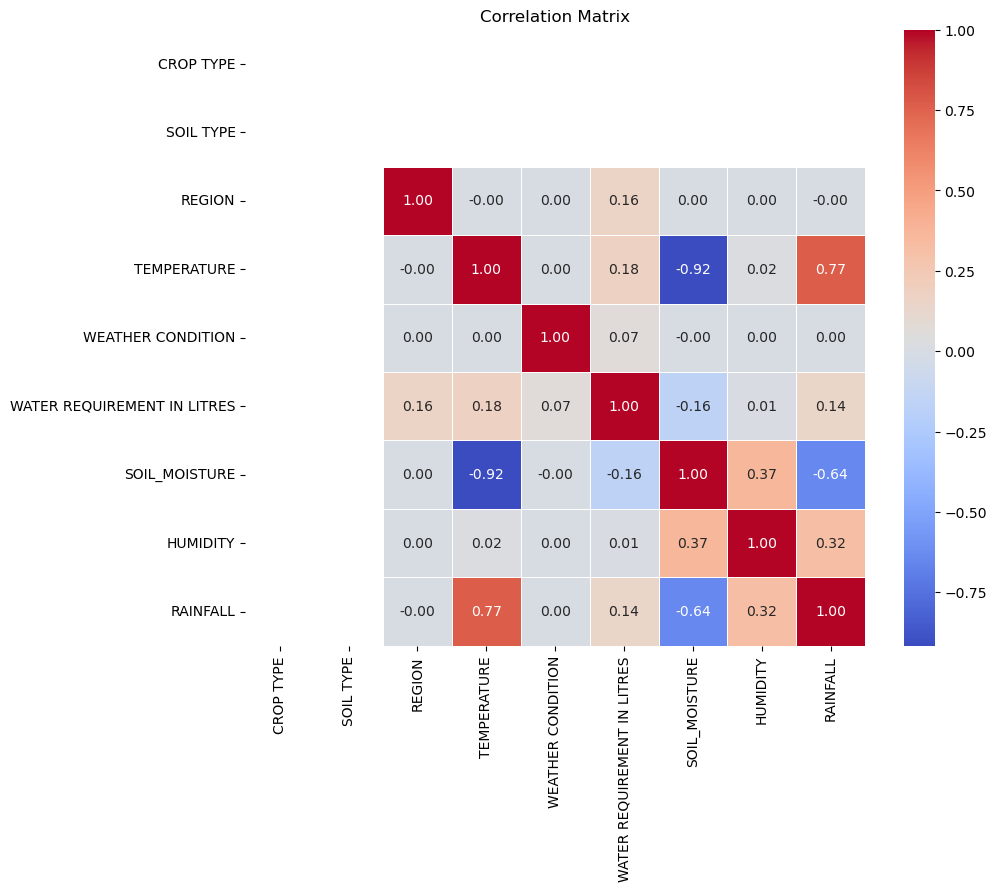

In [36]:
# Compute the correlation matrix
correlation_matrix = df5.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [38]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CROP TYPE                    48 non-null     int32  
 1   SOIL TYPE                    48 non-null     int32  
 2   REGION                       48 non-null     int32  
 3   TEMPERATURE                  48 non-null     int64  
 4   WEATHER CONDITION            48 non-null     int32  
 5   WATER REQUIREMENT IN LITRES  48 non-null     float64
 6   SOIL_MOISTURE                48 non-null     int64  
 7   HUMIDITY                     48 non-null     int64  
 8   RAINFALL                     48 non-null     float64
dtypes: float64(2), int32(4), int64(3)
memory usage: 2.8 KB


R-squared: 0.17921099690287923
Mean Squared Error (MSE): 8.593353066550694
Root Mean Squared Error (RMSE): 2.9314421479112793
Mean Absolute Percentage Error (MAPE): 64.76445148647329%
Accuracy: 35.23554851352671%


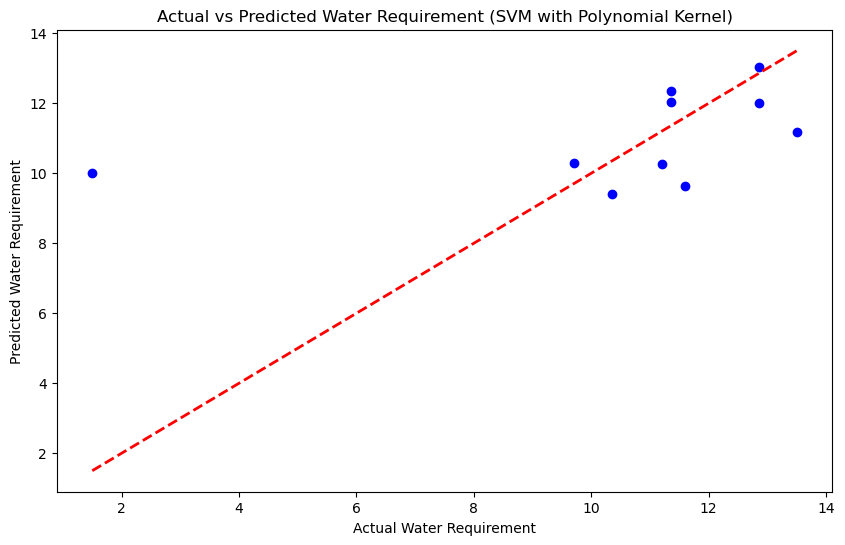

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Ensure the columns that should be numeric are actually numeric
numeric_columns = ['TEMPERATURE', 'SOIL_MOISTURE', 'HUMIDITY', 'RAINFALL', 'WATER REQUIREMENT IN LITRES']
df5[numeric_columns] = df5[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Define features (X) and target (y)
X = df5[['CROP TYPE', 'SOIL TYPE', 'REGION', 'TEMPERATURE', 'WEATHER CONDITION', 'SOIL_MOISTURE', 'HUMIDITY', 'RAINFALL']]
y = df5['WATER REQUIREMENT IN LITRES']

# Handle missing values if any
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Support Vector Machine model
model = SVR(kernel='linear')  # You can adjust the kernel as needed (e.g., 'linear', 'rbf')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
accuracy = 100 - mape

# Print the results
print(f"R-squared: {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"Accuracy: {accuracy}%")

# Plot actual vs predicted graph
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Water Requirement')
plt.ylabel('Predicted Water Requirement')
plt.title('Actual vs Predicted Water Requirement (SVM with Polynomial Kernel)')
plt.show()


In [ ]:
import joblib
# Save the trained SVM model to a file
joblib.dump(model, 'final_ass.pkl')

In [ ]:
# Save the model and label encoders together as a dictionary
joblib.dump({'model': model, 'label_encoders': label_encoders}, 'final_ass.pkl')


In [ ]:
import joblib

# Load the .pkl file
data = joblib.load('final_ass.pkl')

# Print out the contents to understand what was saved
print(data)


In [152]:
import joblib
import numpy as np

# Load the saved model and label encoders
data = joblib.load('final_ass.pkl')
model = data['model']
label_encoders = data['label_encoders']

# Get user input
crop_type = input("Enter the crop name (e.g., RICE, WHEAT): ").strip().upper()
soil_type = input("Enter the soil type (e.g., DRY, HUMID): ").strip().upper()
region = input("Enter the region type (e.g., HUMID, SEMI HUMID, SEMI ARID): ").strip().upper()
temperature = float(input("Enter the temperature (e.g., 25.0): ").strip())
weather_condition = input("Enter the weather condition (e.g., NORMAL, RAINY): ").strip().upper()
soil_moisture = float(input("Enter the soil moisture level (e.g., 30.0): ").strip())
humidity = float(input("Enter the humidity level (e.g., 60.0): ").strip())
rainfall = float(input("Enter the rainfall (e.g., 0.0): ").strip())

# Encode user input
encoded_input = [
    label_encoders['CROP TYPE'].transform([crop_type])[0],
    label_encoders['SOIL TYPE'].transform([soil_type])[0],
    label_encoders['REGION'].transform([region])[0],
    temperature,
    label_encoders['WEATHER CONDITION'].transform([weather_condition])[0],
    soil_moisture,
    humidity,
    rainfall
]

# Convert to numpy array and reshape for prediction
encoded_input = np.array(encoded_input).reshape(1, -1)

# Predict water requirement
predicted_water_requirement = model.predict(encoded_input)

# Output the prediction
print(f"\nPredicted Water Requirement: {predicted_water_requirement[0]:.2f} litres/sq.m")


Enter the crop name (e.g., RICE, WHEAT):  WHEAT
Enter the soil type (e.g., DRY, HUMID):  DRY
Enter the region type (e.g., HUMID, SEMI HUMID, SEMI ARID):  HUMID
Enter the temperature (e.g., 25.0):  25
Enter the weather condition (e.g., NORMAL, RAINY):  NORMAL
Enter the soil moisture level (e.g., 30.0):  30
Enter the humidity level (e.g., 60.0):  60
Enter the rainfall (e.g., 0.0):  0



Predicted Water Requirement: 11.47 litres/sq.m
